# load images

In [1]:
from skimage import io
import numpy as np
import copy

raw_img_path = "data/raw_img.tif" # 3D cell image of a plant
seg_path = "data/seg.tif" # 3D segment

raw_img = np.array(io.imread(raw_img_path))
seg = np.array(io.imread(seg_path))

# raw_img and seg have the same shape
img_shape = raw_img.shape

In [2]:
# shuffle the cell values of seg image for better visual effects
def shuffle(seg_img_np):
    seg_img_np_unique_numbers=np.unique(seg_img_np)
    seg_img_np_unique_numbers=seg_img_np_unique_numbers[seg_img_np_unique_numbers>0]
    seg_img_np_unique_numbers_reshuffle=copy.deepcopy(seg_img_np_unique_numbers)
    np.random.shuffle(seg_img_np_unique_numbers_reshuffle)
    seg_img_np_copy=copy.deepcopy(seg_img_np)
    for i in np.arange(len(seg_img_np_unique_numbers_reshuffle)):
        print("Shuffle progress: "+str(int(100*i/len(seg_img_np_unique_numbers_reshuffle))), end='%\r')
        seg_img_np_copy[np.where(seg_img_np==seg_img_np_unique_numbers[i])]=seg_img_np_unique_numbers_reshuffle[i]
    seg_img_np=seg_img_np_copy
    del seg_img_np_copy
    
    return seg_img_np
seg = shuffle(seg)

# show 3D images

## choose a observation direction

In [3]:
import ipywidgets as widgets
from IPython.display import display
from ipywidgets import interactive

print("Choose the direction of slice for observation (XY, XZ, or YZ) \n")
print("选择观察的平面 (XY平面, XZ平面, 或者YZ平面) \n")
Dropdown=widgets.Dropdown(
    options=[('XY', 1), ('XZ', 2), ('YZ', 3)],
    value=1,
    description='Observe:',
)

def f(x):
    return x

which_slice_direction=interactive(f, x=Dropdown);
display(which_slice_direction)

Choose the direction of slice for observation (XY, XZ, or YZ) 

选择观察的平面 (XY平面, XZ平面, 或者YZ平面) 



interactive(children=(Dropdown(description='Observe:', options=(('XY', 1), ('XZ', 2), ('YZ', 3)), value=1), Ou…

## you can control the slider to see different slices

<IPython.core.display.Javascript object>


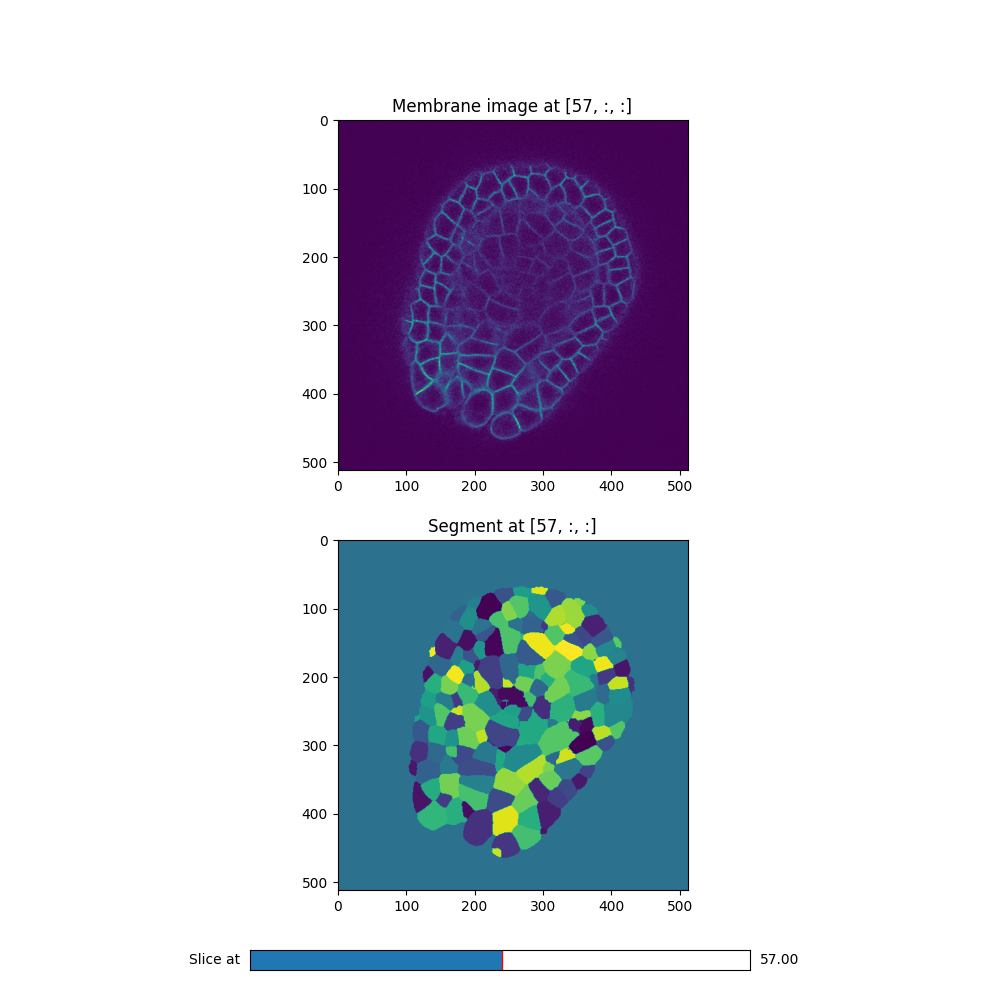

In [4]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.widgets import Slider
%matplotlib notebook

fig, axs = plt.subplots(2, figsize = (10, 10))

initial_N=int(img_shape[3-which_slice_direction.result]/2)
range_N=img_shape[3-which_slice_direction.result]-1

if which_slice_direction.result==1:
    l_raw = axs[0].imshow(raw_img[:,:,initial_N])
    axs[0].set_title("Membrane image at [:, :, "+str(initial_N)+"]")
    l_seg = axs[1].imshow(seg[:,:,initial_N])
    axs[1].set_title("Segment at [:, :, "+str(initial_N)+"]")
elif which_slice_direction.result==2:
    l_raw = axs[0].imshow(raw_img[:,initial_N,:])
    axs[0].set_title("Membrane image at [:, "+str(initial_N)+", :]")
    l_seg = axs[1].imshow(seg[:,initial_N,:])
    axs[1].set_title("Segment at [:, "+str(initial_N)+", :]")
elif which_slice_direction.result==3:
    l_raw = axs[0].imshow(raw_img[initial_N,:,:])
    axs[0].set_title("Membrane image at ["+str(initial_N)+", :, :]")
    l_seg = axs[1].imshow(seg[initial_N,:,:])
    axs[1].set_title("Segment at ["+str(initial_N)+", :, :]")

slice_at = plt.axes([0.25, .03, 0.50, 0.02])

# Slider
slider_slice_at = Slider(slice_at, 'Slice at', 0, range_N, valinit=initial_N)

def update(val):
    # slice_at_temp is the current value of the slider
    N_temp = slider_slice_at.val
    # update img
    if which_slice_direction.result==1:
        l_raw.set_data(raw_img[:,:,int(N_temp)])
        l_seg.set_data(seg[:,:,int(N_temp)])
        axs[0].set_title("Membrane image at [:, :, "+str(int(N_temp))+"]")
        axs[1].set_title("Segment at [:, :, "+str(int(N_temp))+"]")
    elif which_slice_direction.result==2:
        l_raw.set_data(raw_img[:,int(N_temp),:])
        l_seg.set_data(seg[:,int(N_temp),:])
        axs[0].set_title("Membrane image at [:, "+str(int(N_temp))+", :]")
        axs[1].set_title("Segment at [:, "+str(int(N_temp))+", :]")
    elif which_slice_direction.result==3:
        l_raw.set_data(raw_img[int(N_temp),:,:])
        l_seg.set_data(seg[int(N_temp),:,:])
        axs[0].set_title("Membrane image at ["+str(int(N_temp))+", :, :]")
        axs[1].set_title("Segment at ["+str(int(N_temp))+", :, :]")
    # redraw canvas while idle
    fig.canvas.draw_idle()

# call update function on slider value change
slider_slice_at.on_changed(update)

plt.show()

## You can draw some marks on cells
## Click on the seg image!!!

<IPython.core.display.Javascript object>


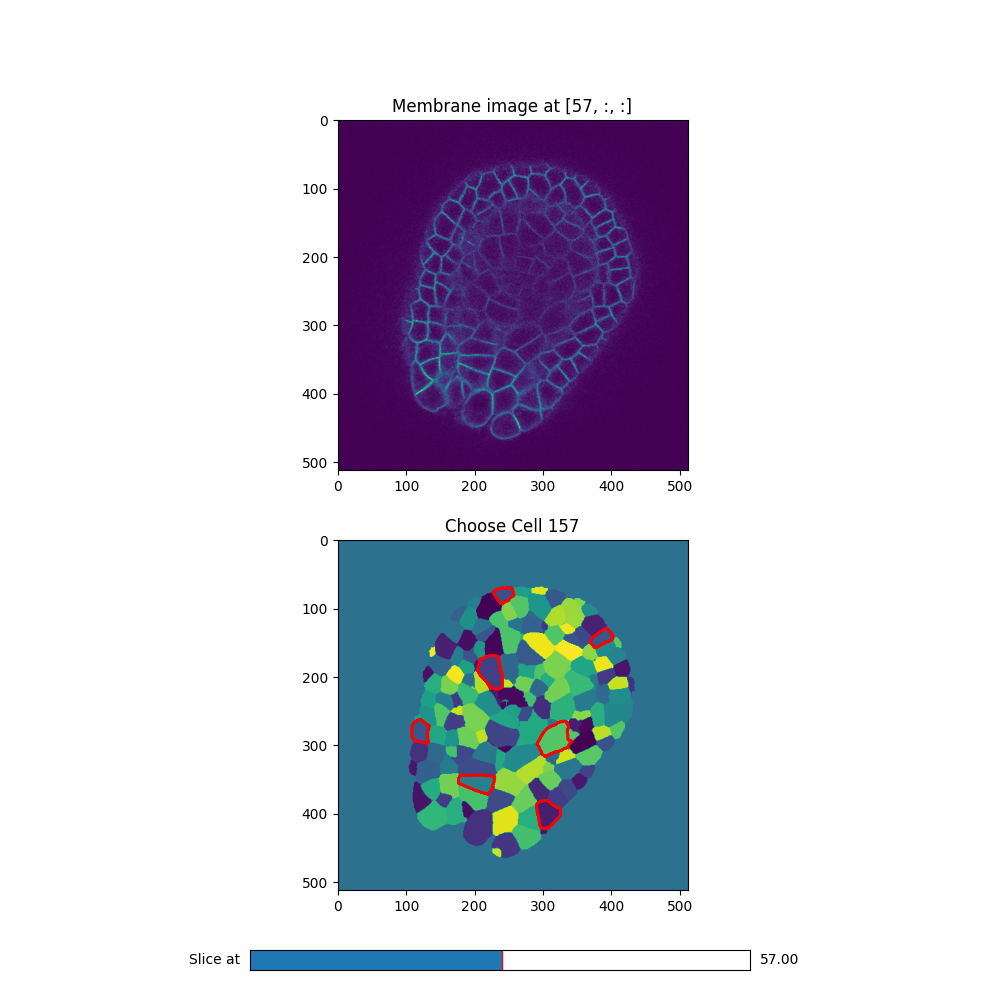

In [5]:
initial_N=int(img_shape[3-which_slice_direction.result]/2)
range_N=img_shape[3-which_slice_direction.result]-1

mark_cells_contour = []

N_temp = initial_N

fig, axs = plt.subplots(2, figsize = (10, 10))

if which_slice_direction.result==1:
    l_raw = axs[0].imshow(raw_img[:,:,initial_N])
    axs[0].set_title("Membrane image at [:, :, "+str(initial_N)+"]")
    l_seg = axs[1].imshow(seg[:,:,initial_N])
    axs[1].set_title("Segment at [:, :, "+str(initial_N)+"]")
    
elif which_slice_direction.result==2:
    l_raw = axs[0].imshow(raw_img[:,initial_N,:])
    axs[0].set_title("Membrane image at [:, "+str(initial_N)+", :]")
    l_seg = axs[1].imshow(seg[:,initial_N,:])
    axs[1].set_title("Segment at [:, "+str(initial_N)+", :]")
    
elif which_slice_direction.result==3:
    l_raw = axs[0].imshow(raw_img[initial_N,:,:])
    axs[0].set_title("Membrane image at ["+str(initial_N)+", :, :]")
    l_seg = axs[1].imshow(seg[initial_N,:,:])
    axs[1].set_title("Segment at ["+str(initial_N)+", :, :]")

slice_at = plt.axes([0.25, .03, 0.50, 0.02])
# Slider
slider_slice_at = Slider(slice_at, 'Slice at', 0, range_N, valinit=initial_N)

def update(val):
    global N_temp, mark_cells_contour
    
    for item in mark_cells_contour:
        item.set_alpha(0)
        # or item.remove()
    
    # slice_at_temp is the current value of the slider
    N_temp = slider_slice_at.val
    # update img
    if which_slice_direction.result==1:
        l_raw.set_data(raw_img[:,:,int(N_temp)])
        l_seg.set_data(seg[:,:,int(N_temp)])
        axs[0].set_title("Membrane image at [:, :, "+str(int(N_temp))+"]")
        axs[1].set_title("Segment at [:, :, "+str(int(N_temp))+"]")
    elif which_slice_direction.result==2:
        l_raw.set_data(raw_img[:,int(N_temp),:])
        l_seg.set_data(seg[:,int(N_temp),:])
        axs[0].set_title("Membrane image at [:, "+str(int(N_temp))+", :]")
        axs[1].set_title("Segment at [:, "+str(int(N_temp))+", :]")
    elif which_slice_direction.result==3:
        l_raw.set_data(raw_img[int(N_temp),:,:])
        l_seg.set_data(seg[int(N_temp),:,:])
        axs[0].set_title("Membrane image at ["+str(int(N_temp))+", :, :]")
        axs[1].set_title("Segment at ["+str(int(N_temp))+", :, :]")
    # redraw canvas while idle
    fig.canvas.draw_idle()

# call update function on slider value change
slider_slice_at.on_changed(update) 

def on_press(event):
    global x_loc, y_loc, N_temp, mark_cells_contour
    
    if event.inaxes == None:
        print("none")
        return 
    
    if event.inaxes == axs[1]:
        x_loc = int(event.ydata)
        y_loc = int(event.xdata)

        show_temp = np.zeros(seg.shape)
        
        if which_slice_direction.result==1:
            cell_num = seg[x_loc, y_loc, int(N_temp)]
            show_temp[seg==cell_num]=1
            show_temp=show_temp[:,:,int(N_temp)]
        elif which_slice_direction.result==2:
            cell_num = seg[x_loc, int(N_temp), y_loc]
            show_temp[seg==cell_num]=1
            show_temp=show_temp[:,int(N_temp),:]
        elif which_slice_direction.result==3:
            cell_num = seg[int(N_temp), x_loc, y_loc]
            show_temp[seg==cell_num]=1
            show_temp=show_temp[int(N_temp),:,:]
        
        if cell_num>0:
            axs[1].set_title("Choose Cell "+str(int(cell_num)))
            mark_cells_contour.append(axs[1].contour(show_temp, colors="red"))
        #更新画板
        fig.canvas.draw_idle()

fig.canvas.mpl_connect('button_press_event', on_press)

plt.show()

## Export gif

<IPython.core.display.Javascript object>


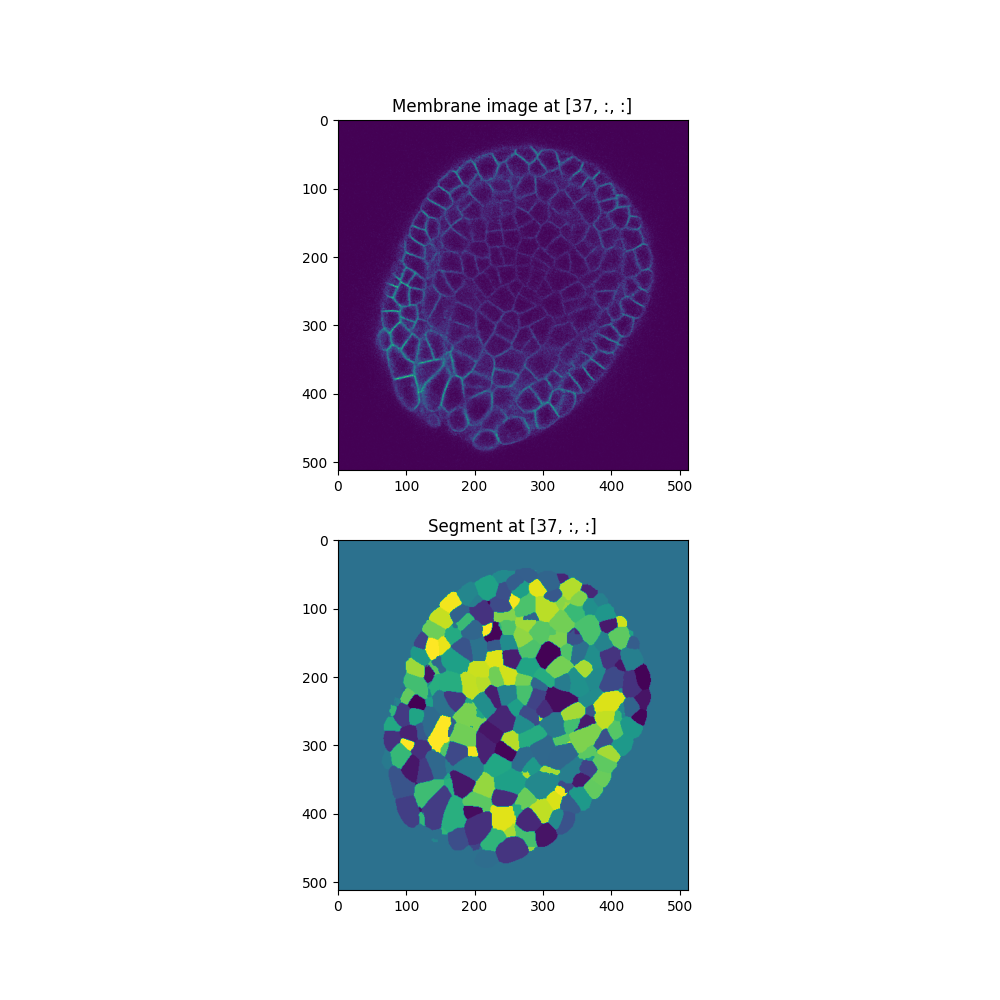

In [6]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.widgets import Slider
%matplotlib notebook

initial_N=0
range_N=img_shape[3-which_slice_direction.result]

fig, axs = plt.subplots(2, figsize = (10, 10))

if which_slice_direction.result==1:
    l_raw = axs[0].imshow(raw_img[:,:,initial_N])
    axs[0].set_title("Membrane image at [:, :, "+str(initial_N)+"]")
    l_seg = axs[1].imshow(seg[:,:,initial_N])
    axs[1].set_title("Segment at [:, :, "+str(initial_N)+"]")
elif which_slice_direction.result==2:
    l_raw = axs[0].imshow(raw_img[:,initial_N,:])
    axs[0].set_title("Membrane image at [:, "+str(initial_N)+", :]")
    l_seg = axs[1].imshow(seg[:,initial_N,:])
    axs[1].set_title("Segment at [:, "+str(initial_N)+", :]")
elif which_slice_direction.result==3:
    l_raw = axs[0].imshow(raw_img[initial_N,:,:])
    axs[0].set_title("Membrane image at ["+str(initial_N)+", :, :]")
    l_seg = axs[1].imshow(seg[initial_N,:,:])
    axs[1].set_title("Segment at ["+str(initial_N)+", :, :]")

def update(val):
    # update img
    if which_slice_direction.result==1:
        l_raw.set_data(raw_img[:,:,int(val)])
        l_seg.set_data(seg[:,:,int(val)])
        axs[0].set_title("Membrane image at [:, :, "+str(int(val))+"]")
        axs[1].set_title("Segment at [:, :, "+str(int(val))+"]")
    elif which_slice_direction.result==2:
        l_raw.set_data(raw_img[:,int(val),:])
        l_seg.set_data(seg[:,int(val),:])
        axs[0].set_title("Membrane image at [:, "+str(int(val))+", :]")
        axs[1].set_title("Segment at [:, "+str(int(val))+", :]")
    elif which_slice_direction.result==3:
        l_raw.set_data(raw_img[int(val),:,:])
        l_seg.set_data(seg[int(val),:,:])
        axs[0].set_title("Membrane image at ["+str(int(val))+", :, :]")
        axs[1].set_title("Segment at ["+str(int(val))+", :, :]")
    
    return fig

anim = animation.FuncAnimation(fig, update, frames=np.arange(0, range_N, 1), interval=200)

plt.show()

In [ ]:
# save gif
anim.save('test_animation.gif',writer='imagemagick')